In [25]:
!pip install catboost

In [26]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
import multiprocessing
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from datetime import datetime
from sklearn.metrics import make_scorer, accuracy_score

from catboost import CatBoostRegressor, Pool

import xgboost as xgb

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

from sklearn.ensemble import VotingRegressor

# Plot
# ==============================================================================

from xgboost import plot_tree


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

# Descarga del target
# ==============================================================================
from google.colab import files

#Primer DataFrame

In [ ]:
DataFrame2 = pd.read_csv('/content/short_df_Encoded.csv')

In [ ]:
DataFrame2.head()

Unnamed: 0  Region_APAC  ...  Pricing, Delivery_Terms_Quote_Appr  Decision
0           0          0.0  ...                                 1.0       0.0
1           1          0.0  ...                                 0.0       1.0
2           2          0.0  ...                                 0.0       1.0
3           3          0.0  ...                                 1.0       0.0
4           4          0.0  ...                                 1.0       0.0

[5 rows x 11 columns]

In [ ]:
DataFrame2.drop(columns = {'Unnamed: 0'}, inplace = True)

In [ ]:
DataFrame2.head()

Region_APAC  Region_Americas  ...  Pricing, Delivery_Terms_Quote_Appr  Decision
0          0.0              0.0  ...                                 1.0       0.0
1          0.0              0.0  ...                                 0.0       1.0
2          0.0              1.0  ...                                 0.0       1.0
3          0.0              1.0  ...                                 1.0       0.0
4          0.0              1.0  ...                                 1.0       0.0

[5 rows x 10 columns]

In [ ]:
DataFrame2Train = DataFrame2.loc[:,DataFrame2.columns != 'Decision']

In [ ]:
DataFrame2Test  =  DataFrame2.loc[:,'Decision']

In [ ]:
DataFrame2Train.shape, DataFrame2Test.shape, DataFrame2.shape

((16772, 9), (16772,), (16772, 10))

##LightGBM


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(DataFrame2Train,DataFrame2Test,test_size = 0.2, random_state = 0)

In [ ]:
model = LGBMRegressor(boosting_type = "goss", n_estimators = 1100, learning_rate = 0.008, random_state = 123)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
preds = model.predict(x_test)

In [ ]:
loss = log_loss(y_test, preds)
loss

In [ ]:
#val = model.feature_importances_

In [ ]:
#df = pd.DataFrame(val)

In [ ]:
#df.columns = ["Value"]
#df.sort_values(by = "Value").plot.bar()

##Catboost

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(DataFrame2Train,DataFrame2Test,test_size = 0.2, random_state = 0)

In [ ]:
modelCatReg1 = CatBoostRegressor(num_boost_round = 1500, learning_rate = 0.007)

#Entreno al modelo
modelCatReg1.fit(x_train2, y_train2)
#Predicciones
preds_CatReg = modelCatReg1.predict(x_test2)
print("CatReg = ", preds_CatReg)

0:	learn: 0.4939131	total: 51.5ms	remaining: 1m 17s
1:	learn: 0.4927485	total: 54.4ms	remaining: 40.7s
2:	learn: 0.4915755	total: 57ms	remaining: 28.5s
3:	learn: 0.4904074	total: 59.7ms	remaining: 22.3s
4:	learn: 0.4892143	total: 62.3ms	remaining: 18.6s
5:	learn: 0.4880268	total: 64.9ms	remaining: 16.2s
6:	learn: 0.4868536	total: 67.5ms	remaining: 14.4s
7:	learn: 0.4857370	total: 70ms	remaining: 13.1s
8:	learn: 0.4846057	total: 72.5ms	remaining: 12s
9:	learn: 0.4834679	total: 75.1ms	remaining: 11.2s
10:	learn: 0.4823718	total: 77.7ms	remaining: 10.5s
11:	learn: 0.4812722	total: 80.3ms	remaining: 9.95s
12:	learn: 0.4801667	total: 82.9ms	remaining: 9.49s
13:	learn: 0.4790675	total: 85.5ms	remaining: 9.08s
14:	learn: 0.4779984	total: 88.1ms	remaining: 8.72s
15:	learn: 0.4769706	total: 90.6ms	remaining: 8.4s
16:	learn: 0.4759180	total: 93.2ms	remaining: 8.13s
17:	learn: 0.4748625	total: 95.8ms	remaining: 7.89s
18:	learn: 0.4738212	total: 98.7ms	remaining: 7.69s
19:	learn: 0.4728012	total: 

In [ ]:
#Error del modelo
rmse1 = np.sqrt(mean_squared_error(y_test2, preds_CatReg))
print("RMSE: %f" % (rmse1))

RMSE: 0.375398


In [ ]:
accuracy1 = accuracy_score(y_test2, preds_CatReg.round().astype('int'))
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 79.73%


In [ ]:
lossCat = log_loss(y_test2, preds_CatReg)
lossCat

0.43018030392205603

##Xgboost

In [ ]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(DataFrame2Train,DataFrame2Test,test_size = 0.2, random_state = 0)

In [ ]:
xg_Regressor1 = xgb.XGBRegressor(objective ='reg:squarederror',colsample_bytree= 0.8, gamma= 1.5, learning_rate= 0.01, max_depth= 20, min_child_weight= 1, n_estimators= 200, subsample= 0.8)

In [ ]:
xg_Regressor1.fit(x_train5,y_train5)

In [ ]:
predsRegressor1 = xg_Regressor1.predict(x_test5)

In [ ]:
value_pred_Regressor1 = pd.DataFrame()
value_pred_Regressor1['pred'] = predsRegressor1
value_pred_Regressor1['pred'].value_counts()

In [ ]:
rmseRegressor1 = np.sqrt(mean_squared_error(y_test5, predsRegressor1))
print("RMSE: %f" % (rmseRegressor1))

In [ ]:
lossRegressor1 = log_loss(y_test5, predsRegressor1)
print(f"Log Loss is {lossRegressor1}")

#Segundo DataFrame


In [27]:
DataFrame3 = pd.read_csv('/content/DataFrame_train_encoded1.csv')

In [28]:
DataFrame3.head()

Unnamed: 0  Total_Amount  ...  Region_Apac  Region_Middle_East
0           0     15.635076  ...            0                   0
1           1     10.940740  ...            0                   0
2           2     11.336971  ...            0                   0
3           3     15.819943  ...            0                   0
4           4     16.407566  ...            0                   0

[5 rows x 15 columns]

In [29]:
DataFrame3.drop(columns = {'Unnamed: 0'}, inplace = True)

In [30]:
DataFrame3.head()

Total_Amount  Delivery_Year  ...  Region_Apac  Region_Middle_East
0     15.635076           2016  ...            0                   0
1     10.940740           2016  ...            0                   0
2     11.336971           2016  ...            0                   0
3     15.819943           2018  ...            0                   0
4     16.407566           2018  ...            0                   0

[5 rows x 14 columns]

In [31]:
DataFrame3Train = DataFrame3.loc[:,DataFrame3.columns != 'Decision']

In [32]:
DataFrame3Test  =  DataFrame3.loc[:,'Decision']

In [33]:
DataFrame3Train.shape, DataFrame3Test.shape, DataFrame3.shape

((16772, 13), (16772,), (16772, 14))

##LightGBM

In [34]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(DataFrame3Train,DataFrame3Test,test_size = 0.2, random_state = 0)

In [35]:
modelLGBMReg2 = LGBMRegressor(boosting_type = "goss", n_estimators = 400, learning_rate = 0.001, random_state = 123)

In [13]:
modelLGBMReg2.fit(x_train3, y_train3)

LGBMRegressor(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.001, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [14]:
predsLGBMReg2 = modelLGBMReg2.predict(x_test3)

In [ ]:
loss = log_loss(y_test3, predsLGBMReg2)
loss

0.5664084702834128

##Catboost

In [64]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(DataFrame3Train,DataFrame3Test,test_size = 0.2, random_state = 0)

In [83]:
#modelCatReg2 = CatBoostRegressor(num_boost_round = 1500, depth= 10, l2_leaf_reg= 20, learning_rate= 0.1)
modelCatReg2 = CatBoostRegressor(num_boost_round = 1500, learning_rate = 0.009)


In [89]:
#Entreno al modelo
modelCatReg2.fit(x_train4, y_train4, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4935263	total: 13ms	remaining: 19.4s
1:	learn: 0.4919455	total: 16.9ms	remaining: 12.7s
2:	learn: 0.4904114	total: 20ms	remaining: 9.97s
3:	learn: 0.4888366	total: 24.6ms	remaining: 9.18s
4:	learn: 0.4872694	total: 27.5ms	remaining: 8.22s
5:	learn: 0.4857313	total: 35.7ms	remaining: 8.88s
6:	learn: 0.4842566	total: 38.7ms	remaining: 8.26s
7:	learn: 0.4827884	total: 46.1ms	remaining: 8.6s
8:	learn: 0.4813242	total: 49ms	remaining: 8.11s
9:	learn: 0.4799071	total: 56.9ms	remaining: 8.48s
10:	learn: 0.4784673	total: 60.2ms	remaining: 8.15s
11:	learn: 0.4771718	total: 67.1ms	remaining: 8.32s
12:	learn: 0.4758592	total: 70.6ms	remaining: 8.08s
13:	learn: 0.4744548	total: 78.7ms	remaining: 8.36s
14:	learn: 0.4731458	total: 82ms	remaining: 8.11s
15:	learn: 0.4718212	total: 89.3ms	remaining: 8.29s
16:	learn: 0.4705014	total: 93.1ms	remaining: 8.12s
17:	learn: 0.4692000	total: 105ms	remaining: 8.65s
18:	learn: 0.4679004	total: 118ms	remaining: 9.22s
19:	learn: 0.4667171	total: 129ms

In [18]:
preds_CatReg2 = modelCatReg2.predict(x_test4)
print("CatReg = ", preds_CatReg2)

CatReg =  [0.2955364  0.79697411 0.81249236 ... 0.4493895  0.65284574 0.85713285]


In [ ]:
#Error del modelo
rmse2 = np.sqrt(mean_squared_error(y_test4, preds_CatReg2))
print("RMSE: %f" % (rmse2))

RMSE: 0.359581


In [ ]:
accuracy2 = accuracy_score(y_test4, preds_CatReg2.round().astype('int'))
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

Accuracy: 80.63%


In [ ]:
lossCat2 = log_loss(y_test4, preds_CatReg2)
lossCat2

0.3976465471847935

##Xgboost

In [67]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(DataFrame3Train,DataFrame3Test,test_size = 0.2, random_state = 0)

In [68]:
xg_Regressor2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree= 0.8, gamma= 1.5, learning_rate= 0.01, max_depth= 20, min_child_weight= 1, n_estimators= 280, subsample= 0.8)

In [69]:
xg_Regressor2.fit(x_train6,y_train6)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=280,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

In [22]:
predsRegressor2 = xg_Regressor2.predict(x_test6)

In [ ]:
value_pred_Regressor2 = pd.DataFrame()
value_pred_Regressor2['pred'] = predsRegressor2
value_pred_Regressor2['pred'].value_counts()

0.046646    62
0.994301    29
0.949301    26
0.073651    21
0.947830    19
            ..
0.815408     1
0.336826     1
0.462174     1
0.923647     1
0.613282     1
Name: pred, Length: 2478, dtype: int64

In [ ]:
rmseRegressor2 = np.sqrt(mean_squared_error(y_test6, predsRegressor2))
print("RMSE: %f" % (rmseRegressor2))

RMSE: 0.356058


In [ ]:
lossRegressor2 = log_loss(y_test6, predsRegressor2)
print(f"Log Loss is {lossRegressor2}")

Log Loss is 0.401787939232298


##Adaboost

###Xgboost

In [40]:
ada = AdaBoostRegressor(xg_Regressor2, learning_rate = 0.001)

In [41]:
ada.fit(x_train6,y_train6)

AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.8, gamma=1.5,
                                              importance_type='gain',
                                              learning_rate=0.01,
                                              max_delta_step=0, max_depth=20,
                                              min_child_weight=1, missing=None,
                                              n_estimators=280, n_jobs=1,
                                              nthread=None,
                                              objective='reg:squarederror',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              see

In [42]:
predsadaregressor1 = ada.predict(x_test6)

In [ ]:
value_pred_Regressor2 = pd.DataFrame()
value_pred_Regressor2['pred'] = predsadaregressor1
value_pred_Regressor2['pred'].value_counts()

In [ ]:
rmseAdaRegressor1 = np.sqrt(mean_squared_error(y_test6, predsadaregressor1))
print("RMSE: %f" % (rmseAdaRegressor1))

In [ ]:
lossAdaRegressor1 = log_loss(y_test6, predsadaregressor1)
print(f"Log Loss is {lossAdaRegressor1}")

###Catbooost

In [43]:
ada2 = AdaBoostRegressor(modelCatReg2,learning_rate = 0.001)

In [44]:
ada2.fit(x_train6,y_train6)

Se han truncado las últimas 5000 líneas del flujo de salida.
1000:	learn: 0.3592437	total: 3.91s	remaining: 1.95s
1001:	learn: 0.3592232	total: 3.92s	remaining: 1.95s
1002:	learn: 0.3591863	total: 3.92s	remaining: 1.94s
1003:	learn: 0.3591855	total: 3.92s	remaining: 1.94s
1004:	learn: 0.3591745	total: 3.92s	remaining: 1.93s
1005:	learn: 0.3591567	total: 3.93s	remaining: 1.93s
1006:	learn: 0.3591332	total: 3.93s	remaining: 1.92s
1007:	learn: 0.3591188	total: 3.93s	remaining: 1.92s
1008:	learn: 0.3591079	total: 3.94s	remaining: 1.92s
1009:	learn: 0.3590980	total: 3.94s	remaining: 1.91s
1010:	learn: 0.3590751	total: 3.94s	remaining: 1.91s
1011:	learn: 0.3590366	total: 3.95s	remaining: 1.9s
1012:	learn: 0.3590191	total: 3.95s	remaining: 1.9s
1013:	learn: 0.3589949	total: 3.95s	remaining: 1.89s
1014:	learn: 0.3589813	total: 3.95s	remaining: 1.89s
1015:	learn: 0.3589582	total: 3.96s	remaining: 1.89s
1016:	learn: 0.3589290	total: 3.96s	remaining: 1.88s
1017:	learn: 0.3589172	total: 3.96s	rema

AdaBoostRegressor(base_estimator=<catboost.core.CatBoostRegressor object at 0x7f168ed0a190>,
                  learning_rate=0.001, loss='linear', n_estimators=50,
                  random_state=None)

In [45]:
predsadaregressor2 = ada2.predict(x_test6)

###LightGBM

In [46]:
ada3 = AdaBoostRegressor(modelLGBMReg2, learning_rate = 0.001 )

In [47]:
ada3.fit(x_train6,y_train6)

AdaBoostRegressor(base_estimator=LGBMRegressor(boosting_type='goss',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.001,
                                               max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=400, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=123, reg_alpha=0.0,
                                               reg_lambda=0.0, silent=True,
                                               subsample=1.0,
                

In [48]:
predsadaregressor3 = ada3.predict(x_test6)

###VotingRegressor de los 3 modelos

In [49]:
vot_3modelos_reg = VotingRegressor([('xgb',ada), ('catb',ada2), ('lgbm',ada3)])

In [50]:
vot_3modelos_reg.fit(x_train6,y_train6)

Se han truncado las últimas 5000 líneas del flujo de salida.
1000:	learn: 0.3599122	total: 3.58s	remaining: 1.78s
1001:	learn: 0.3598967	total: 3.58s	remaining: 1.78s
1002:	learn: 0.3598922	total: 3.58s	remaining: 1.77s
1003:	learn: 0.3598710	total: 3.59s	remaining: 1.77s
1004:	learn: 0.3598579	total: 3.59s	remaining: 1.77s
1005:	learn: 0.3598431	total: 3.59s	remaining: 1.76s
1006:	learn: 0.3598250	total: 3.6s	remaining: 1.76s
1007:	learn: 0.3598016	total: 3.6s	remaining: 1.76s
1008:	learn: 0.3597878	total: 3.6s	remaining: 1.75s
1009:	learn: 0.3597739	total: 3.6s	remaining: 1.75s
1010:	learn: 0.3597477	total: 3.61s	remaining: 1.75s
1011:	learn: 0.3597278	total: 3.61s	remaining: 1.74s
1012:	learn: 0.3597046	total: 3.61s	remaining: 1.74s
1013:	learn: 0.3596980	total: 3.62s	remaining: 1.73s
1014:	learn: 0.3596844	total: 3.62s	remaining: 1.73s
1015:	learn: 0.3596378	total: 3.62s	remaining: 1.73s
1016:	learn: 0.3596177	total: 3.63s	remaining: 1.72s
1017:	learn: 0.3596061	total: 3.63s	remain

VotingRegressor(estimators=[('xgb',
                             AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5,
                                                                           booster='gbtree',
                                                                           colsample_bylevel=1,
                                                                           colsample_bynode=1,
                                                                           colsample_bytree=0.8,
                                                                           gamma=1.5,
                                                                           importance_type='gain',
                                                                           learning_rate=0.01,
                                                                           max_delta_step=0,
                                                                           max_depth=20,
                              

In [51]:
preds_vot_3mod = vot_3modelos_reg.predict(x_test6)

In [52]:
value_pred_vot_Regressor3_mod = pd.DataFrame()
value_pred_vot_Regressor3_mod['pred'] = preds_vot_3mod
value_pred_vot_Regressor3_mod['pred'].value_counts()

0.149141    23
0.149102    22
0.877106    16
0.876019    16
0.876305    15
            ..
0.545539     1
0.456180     1
0.662439     1
0.676884     1
0.489082     1
Name: pred, Length: 2713, dtype: int64

In [53]:
rmseRegressorvot_3mod = np.sqrt(mean_squared_error(y_test6, preds_vot_3mod))
print("RMSE: %f" % (rmseRegressorvot_3mod))

RMSE: 0.370532


In [54]:
lossRegressorvot_3mod = log_loss(y_test6, preds_vot_3mod)
print(f"Log Loss is {lossRegressorvot_3mod}")

Log Loss is 0.43894077811251314


##Plots


In [55]:
!pip install shap
import shap
shap.initjs()

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [56]:
from matplotlib.pylab import rcParams

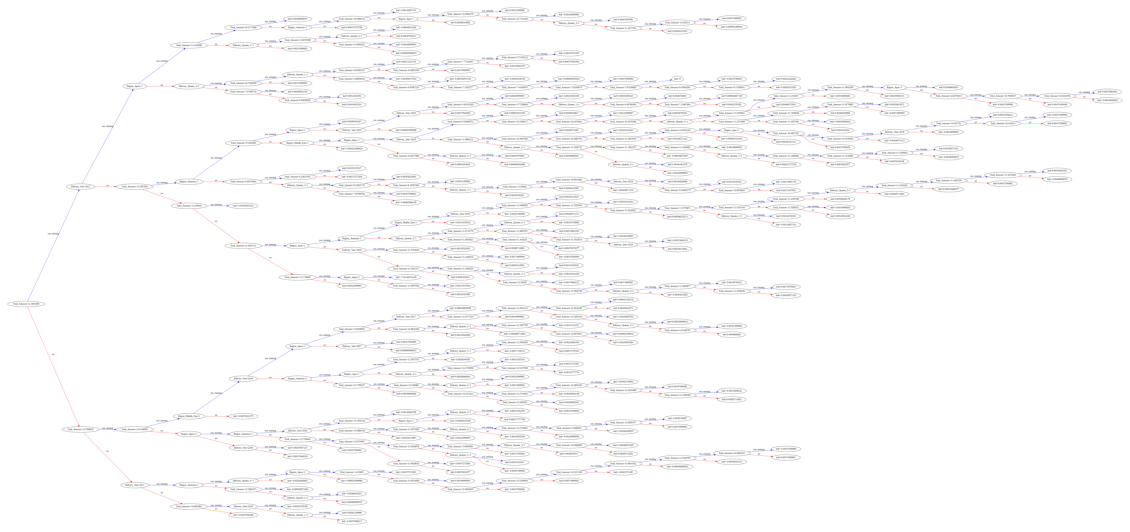

In [78]:
plot_tree(xg_Regressor2, rankdir='LR')
rcParams['figure.figsize'] = 200,100
plt.show()

In [79]:
shap.initjs()
shap_values = modelCatReg2.get_feature_importance(Pool(DataFrame3Train, DataFrame3Test), type='ShapValues')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

#Primeras predicciones del modelo
shap.force_plot(expected_value, shap_values[0,:], DataFrame3Train.iloc[0,:])

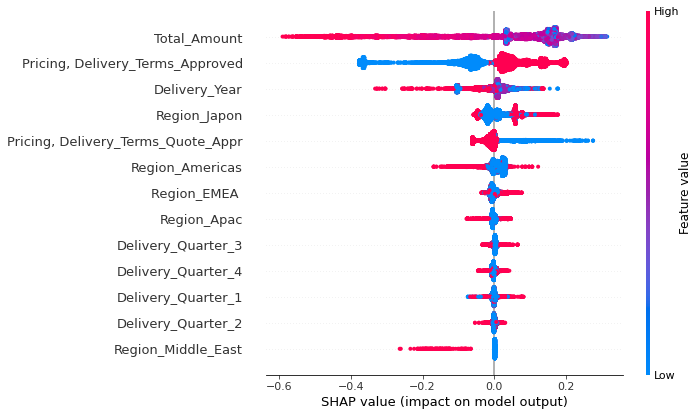

In [80]:
shap.initjs()
# summarize the effects of all the features
shap.summary_plot(shap_values,DataFrame3Train )

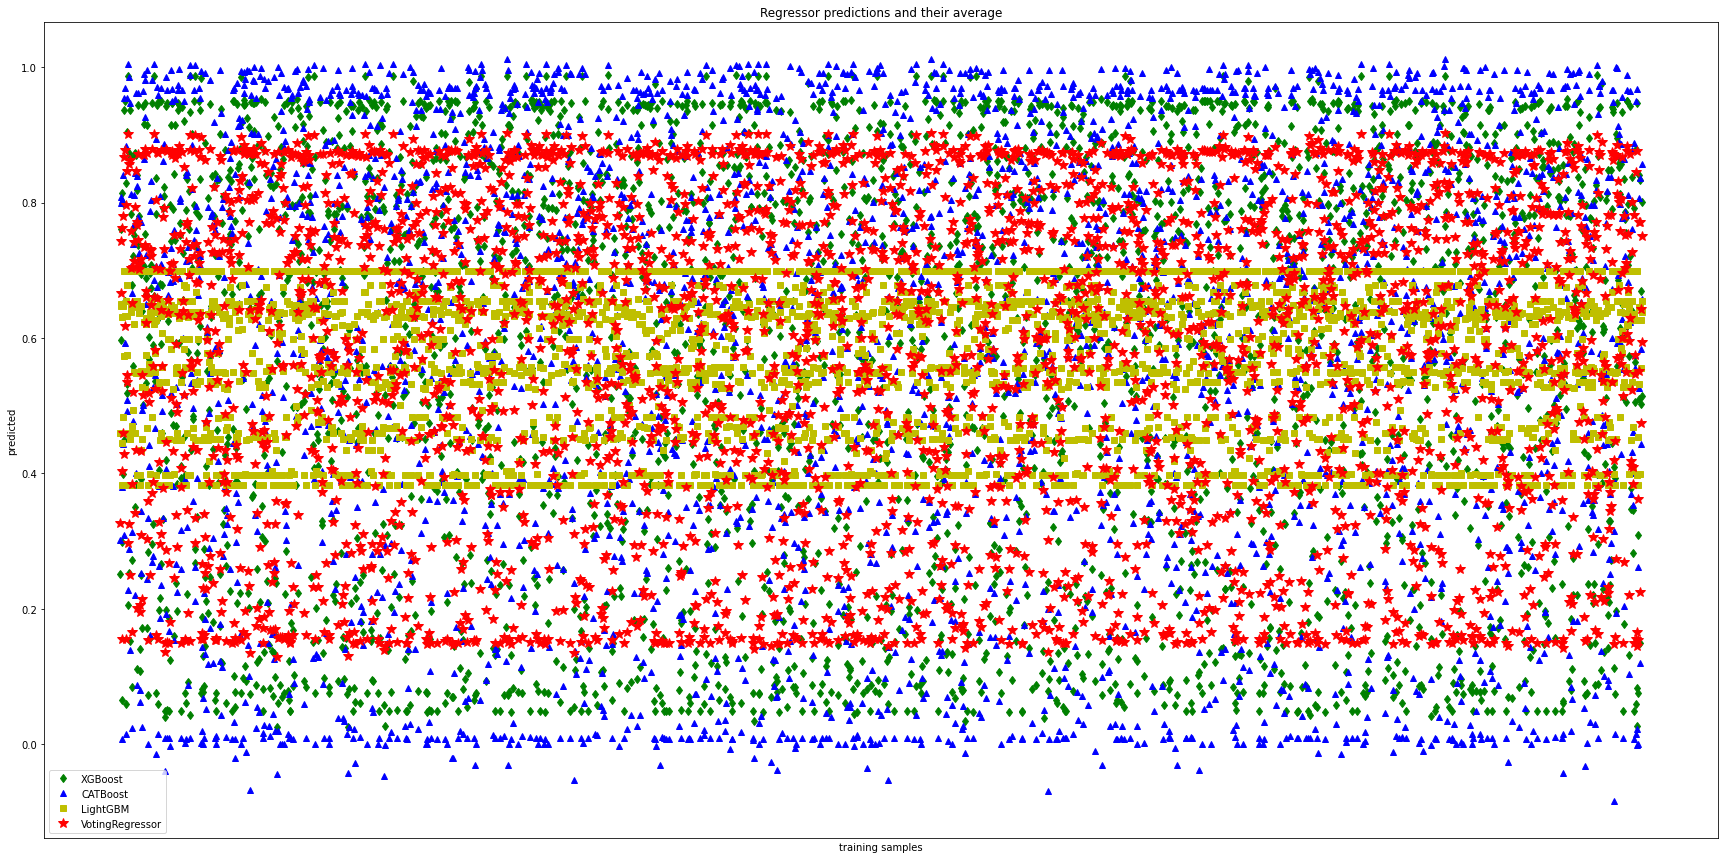

In [71]:
rcParams['figure.figsize'] = 30,15

plt.plot(predsadaregressor1, 'gd', label='XGBoost')
plt.plot(predsadaregressor2, 'b^', label='CATBoost')
plt.plot(predsadaregressor3, 'ys', label='LightGBM')
plt.plot(preds_vot_3mod, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')


plt.show()

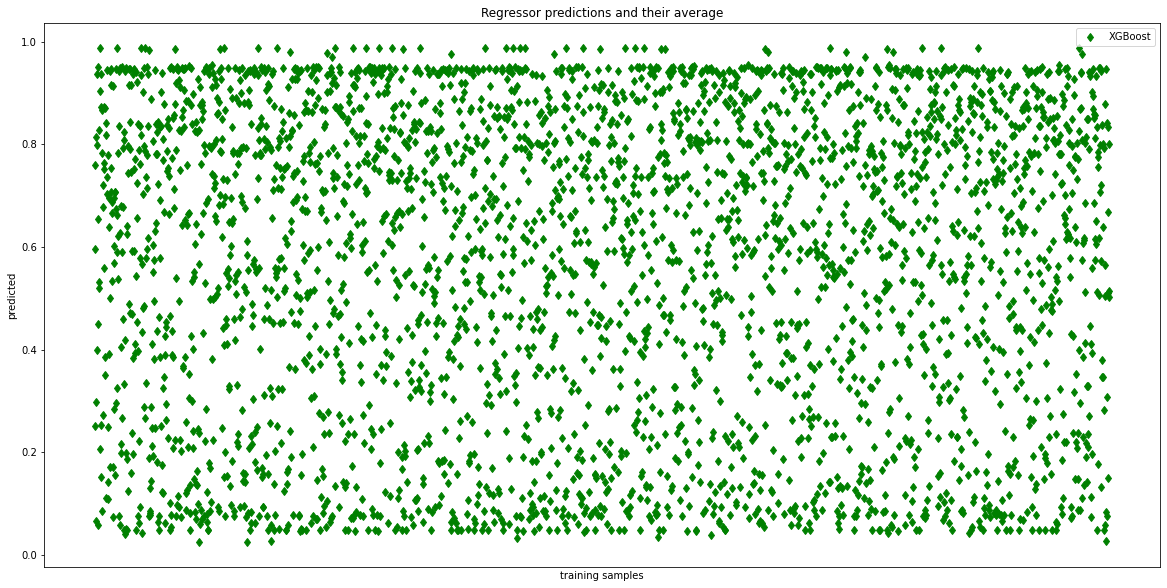

In [72]:
rcParams['figure.figsize'] = 20,10

plt.plot(predsadaregressor1, 'gd', label='XGBoost')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')


plt.show()

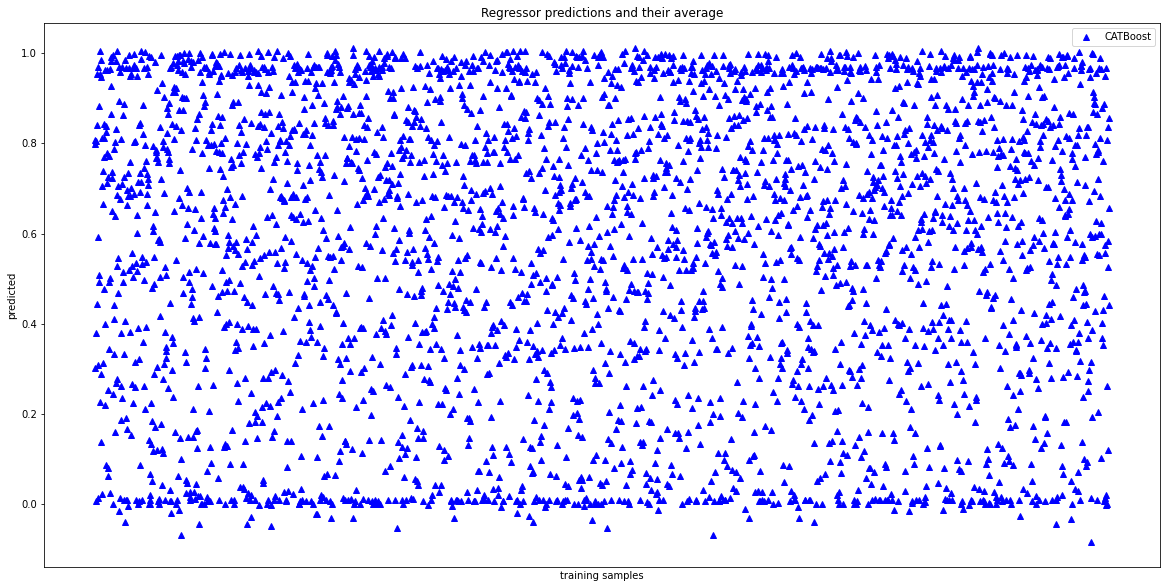

In [74]:
rcParams['figure.figsize'] = 20,10

plt.plot(predsadaregressor2, 'b^', label='CATBoost')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')


plt.show()

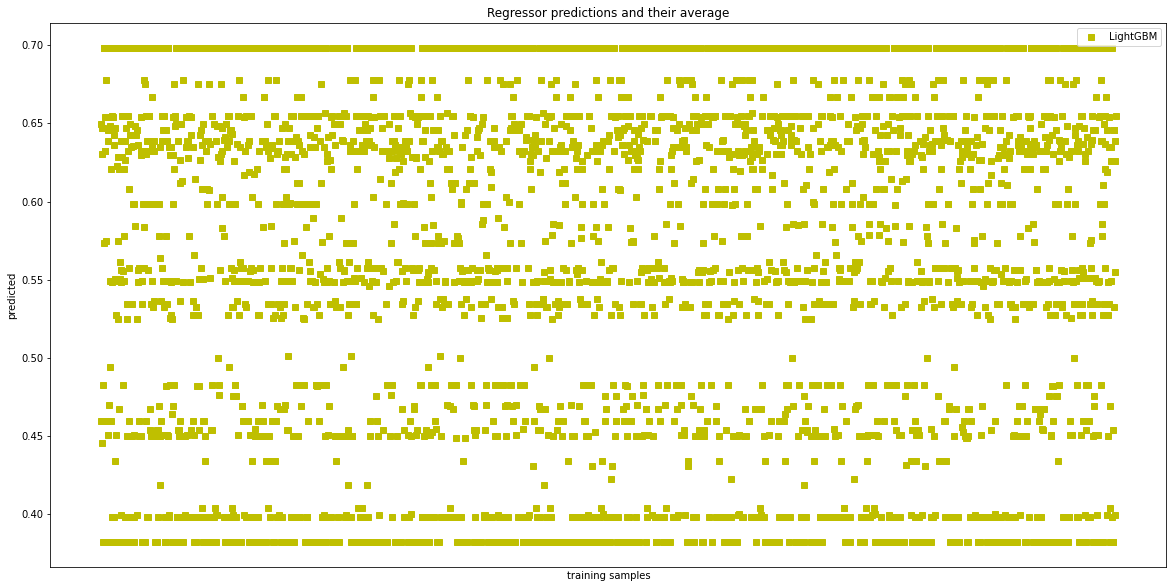

In [75]:
rcParams['figure.figsize'] = 20,10

plt.plot(predsadaregressor3, 'ys', label='LightGBM')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')


plt.show()

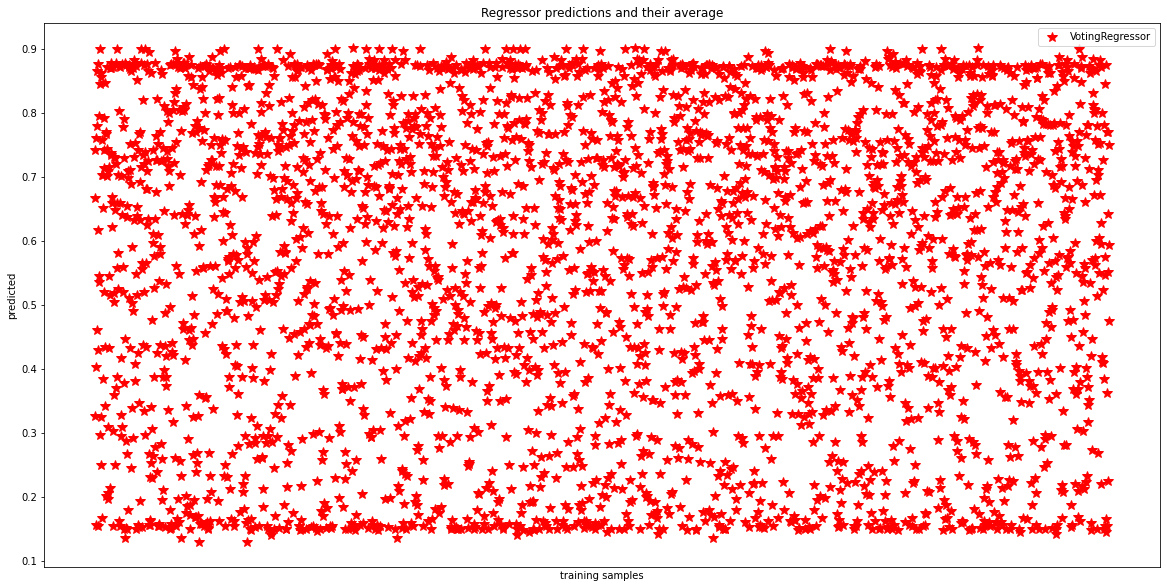

In [91]:
rcParams['figure.figsize'] = 20,10

plt.plot(preds_vot_3mod, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')


plt.show()

##Test

In [ ]:
DataFrameTest3 = pd.read_csv('/content/DataFrame_test_encoded1.csv')

In [ ]:
DataFrameTest3.head()

Unnamed: 0  Opportunity_ID  ...  Region_Apac  Region_Middle_East
0           2           10689  ...            0                   0
1           7           10690  ...            0                   0
2           8           10691  ...            0                   0
3          14           10692  ...            0                   0
4          15           10693  ...            0                   0

[5 rows x 15 columns]

In [ ]:
DataFrameTest3.drop(columns = {'Unnamed: 0'}, inplace = True)

In [ ]:
DataFrameTest3.head()

Opportunity_ID  Total_Amount  ...  Region_Apac  Region_Middle_East
0           10689     11.905436  ...            0                   0
1           10690     11.787392  ...            0                   0
2           10691      9.954062  ...            0                   0
3           10692     12.338534  ...            0                   0
4           10693      8.657390  ...            0                   0

[5 rows x 14 columns]

In [ ]:
DescargaPredVotRegressor2 = pd.DataFrame()
DescargaPredVotRegressor2['Opportunity_ID'] = DataFrameTest3['Opportunity_ID']
DescargaPredVotRegressor2.set_index('Opportunity_ID', inplace = True)

In [ ]:
DataFrameTest3 = DataFrameTest3.drop(columns={'Opportunity_ID'})
DataFrameTest3.head()

Total_Amount  Delivery_Year  ...  Region_Apac  Region_Middle_East
0     11.905436           2019  ...            0                   0
1     11.787392           2019  ...            0                   0
2      9.954062           2019  ...            0                   0
3     12.338534           2019  ...            0                   0
4      8.657390           2019  ...            0                   0

[5 rows x 13 columns]

In [ ]:
predvotTest2 = vot_3modelos_reg.predict(DataFrameTest3)

In [ ]:
DescargaPredVotRegressor2['target'] = predvotTest2
DescargaPredVotRegressor2

target
Opportunity_ID          
10689           0.407385
10690           0.438596
10691           0.601797
10692           0.442374
10693           0.560839
...                  ...
12364           0.458298
12365           0.567533
12366           0.653974
12367           0.665546
12368           0.143594

[1567 rows x 1 columns]

In [ ]:
DescargaPredVotRegressor2['target'].describe()

count    1567.000000
mean        0.473822
std         0.204047
min         0.002682
25%         0.320522
50%         0.494411
75%         0.631157
max         0.882893
Name: target, dtype: float64

In [ ]:
csv4 = DescargaPredVotRegressor2.to_csv('vot_regression_pred2.csv')
files.download('vot_regression_pred2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##GridSearch

###Catboost

In [ ]:
#modelCatReggrid = CatBoostRegressor(learning_rate = 0.0075, verbose = True, random_seed = 123, loss_function = "RMSE", num_boost_round = 150, max_depth = 16)

In [ ]:
modelcat = CatBoostRegressor()

grid = {'learning_rate': [0.1, 0.01,0.001, 0.009],
        'max_depth': [6, 10, 16,20],
        'l2_leaf_reg': [None,2,10,20,30],
        'num_boost_round':[1500]}

grid_search_cat_result = modelcat.grid_search(grid, 
                                       X=x_train6, 
                                       y=y_train6, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.3588942943
bestIteration = 987

0:	loss: 0.3588943	best: 0.3588943 (0)	total: 2.87s	remaining: 3m 47s

bestTest = 0.3688506894
bestIteration = 999

1:	loss: 0.3688507	best: 0.3588943 (0)	total: 5.33s	remaining: 3m 27s

bestTest = 0.4581745931
bestIteration = 999

2:	loss: 0.4581746	best: 0.3588943 (0)	total: 7.8s	remaining: 3m 20s

bestTest = 0.3695724158
bestIteration = 999

3:	loss: 0.3695724	best: 0.3588943 (0)	total: 10.3s	remaining: 3m 15s

bestTest = 0.3595399006
bestIteration = 999

4:	loss: 0.3595399	best: 0.3588943 (0)	total: 12.8s	remaining: 3m 11s

bestTest = 0.3698905993
bestIteration = 999

5:	loss: 0.3698906	best: 0.3588943 (0)	total: 15.2s	remaining: 3m 7s

bestTest = 0.4604335019
bestIteration = 999

6:	loss: 0.4604335	best: 0.3588943 (0)	total: 17.7s	remaining: 3m 4s

bestTest = 0.3704788341
bestIteration = 999

7:	loss: 0.3704788	best: 0.3588943 (0)	total: 20.2s	remaining: 3m 1s

bestTest = 0.3606923313
bestIteration = 987

8:	loss: 0.3606923	best: 0.358

In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid_search_cat_result.best_params_, ":", grid_search_cat_result.best_score_, grid_search_cat_result.scoring)

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

#Tercer DataFrame

In [ ]:
short_df = pd.read_csv( "/content/short_df_train_encoded_4.csv" )

In [ ]:
short_df.head()

Opportunity_ID  Total_Amount  ...  Opportunity_Owner  Decision
0               0     15.635076  ...           0.560776         0
1               1     10.940740  ...           0.750000         1
2              19     12.624960  ...           0.261905         0
3              20     11.702880  ...           0.664537         1
4              23     12.433069  ...           0.560776         1

[5 rows x 7 columns]

In [ ]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(
                                        short_df.drop(columns = 'Decision'),
                                        short_df['Decision'],
                                        random_state = 123
                                    )

In [ ]:
X_train7.shape, X_test7.shape, y_train7.shape, y_test7.shape

((10187, 6), (3396, 6), (10187,), (3396,))

##Catboost

In [ ]:
#modelCatReg3 = CatBoostRegressor(learning_rate = 0.0075, verbose = True, random_seed = 123, loss_function = "RMSE", num_boost_round = 1500, max_depth = 16)
modelCatReg3 = CatBoostRegressor(num_boost_round = 1500, learning_rate = 0.009)

In [ ]:
modelCatReg3.fit(X_train7, y_train7)

0:	learn: 0.4956229	total: 1.38s	remaining: 34m 32s
1:	learn: 0.4941426	total: 2.13s	remaining: 26m 39s
2:	learn: 0.4926921	total: 2.87s	remaining: 23m 51s
3:	learn: 0.4912821	total: 3.59s	remaining: 22m 21s
4:	learn: 0.4899263	total: 4.33s	remaining: 21m 33s
5:	learn: 0.4885555	total: 5.04s	remaining: 20m 53s
6:	learn: 0.4872137	total: 5.79s	remaining: 20m 34s
7:	learn: 0.4858374	total: 6.53s	remaining: 20m 17s
8:	learn: 0.4845138	total: 7.19s	remaining: 19m 51s
9:	learn: 0.4831716	total: 7.94s	remaining: 19m 43s
10:	learn: 0.4818197	total: 8.67s	remaining: 19m 33s
11:	learn: 0.4805117	total: 9.42s	remaining: 19m 28s
12:	learn: 0.4792103	total: 10.2s	remaining: 19m 21s
13:	learn: 0.4779420	total: 10.9s	remaining: 19m 12s
14:	learn: 0.4767076	total: 11.5s	remaining: 19m 1s
15:	learn: 0.4755061	total: 12.3s	remaining: 18m 57s
16:	learn: 0.4742706	total: 13s	remaining: 18m 53s
17:	learn: 0.4730196	total: 13.7s	remaining: 18m 51s
18:	learn: 0.4717998	total: 14.5s	remaining: 18m 47s
19:	le

In [ ]:
preds_CatReg3 = modelCatReg3.predict(X_test7)

In [ ]:
#Error del modelo
rmsecat3 = np.sqrt(mean_squared_error(y_test7, preds_CatReg3))
print("RMSE: %f" % (rmsecat3))

RMSE: 0.358687


In [ ]:
losscat3 = log_loss(y_test7, preds_CatReg3)
losscat3

0.4572596287410401

##Lightgbm


In [ ]:
lgbm3 = LGBMRegressor(boosting_type = "goss", n_estimators = 700, learning_rate = 0.1, random_state = 123)

In [ ]:
lgbm3.fit(X_train7, y_train7)

In [ ]:
predslgbm3 = lgbm3.predict(X_test7)

In [ ]:
value_pred_lgbm_Regressor3 = pd.DataFrame()
value_pred_lgbm_Regressor3['pred'] = predslgbm3
value_pred_lgbm_Regressor3['pred'].describe()

In [ ]:
rmselgbmRegressor3 = np.sqrt(mean_squared_error(y_test7, predslgbm3))
print("RMSE: %f" % (rmselgbmRegressor3))

In [ ]:
losslgbmRegressor3 = log_loss(y_test7, predslgbm3)
print(f"Log Loss is {losslgbmRegressor3}")

##Xgboost

In [ ]:
xg_Regressor3 = xgb.XGBRegressor(colsample_bytree= 0.8, gamma= 1.5, learning_rate= 0.001, max_depth= 20, min_child_weight= 1, n_estimators= 200, subsample= 0.8)

In [ ]:
xg_Regressor3.fit(X_train7, y_train7)

[18:32:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [ ]:
predsRegressor3 = xg_Regressor3.predict(X_test7)

In [ ]:
value_pred_Regressor3 = pd.DataFrame()
value_pred_Regressor3['pred'] = predsRegressor3
value_pred_Regressor3['pred'].value_counts()

0.417617    13
0.419321     6
0.417678     6
0.551609     5
0.474670     4
            ..
0.567697     1
0.434123     1
0.552563     1
0.553160     1
0.557619     1
Name: pred, Length: 347, dtype: int64

In [ ]:
rmseRegressor3 = np.sqrt(mean_squared_error(y_test7, predsRegressor3))
print("RMSE: %f" % (rmseRegressor3))

RMSE: 0.461623


In [ ]:
lossRegressor3 = log_loss(y_test7, predsRegressor3)
print(f"Log Loss is {lossRegressor3}")

Log Loss is 0.6188645214206724


###Plot

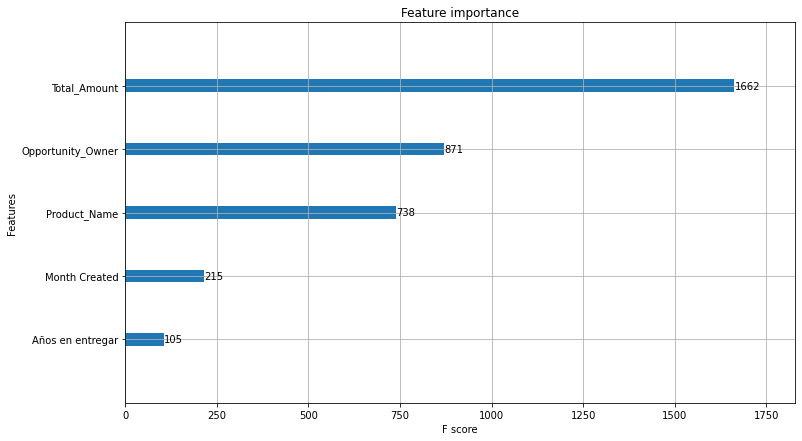

In [ ]:
plt.rcParams['figure.figsize'] = [12, 7]
xgb.plot_importance(xg_Regressor3)

##Adaboost

In [ ]:
adaxg2 = AdaBoostRegressor(xg_Regressor3, learning_rate = 0.001)

In [ ]:
adacat2 = AdaBoostRegressor(modelCatReg3,learning_rate = 0.001)

##VotingRegressor

In [ ]:
reg3 = adaxg2

In [ ]:
reg4 = adacat2

In [ ]:
#reg5 = modelLGBMReg3

In [ ]:
vot_reg_ada2 = VotingRegressor([('xg',reg3),('cat',reg4)])

In [ ]:
vot_reg_ada2.fit(X_train7,y_train7)

In [ ]:
preds_vot_ada2 = vot_reg_ada2.predict(X_test7)

In [ ]:
value_pred_vot_Regressor2 = pd.DataFrame()
value_pred_vot_Regressor2['pred'] = preds_vot_ada2
value_pred_vot_Regressor2['pred'].value_counts()

In [ ]:
rmseRegressorvot2 = np.sqrt(mean_squared_error(y_test7, preds_vot_ada2))
print("RMSE: %f" % (rmseRegressorvot2))

In [ ]:
lossRegressorvot2 = log_loss(y_test7, preds_vot_ada2)
print(f"Log Loss is {lossRegressorvot2}")

##Test

In [ ]:
df_test = pd.read_csv( "/content/short_df_test_encoded_4.csv" )
df_test.head()

Opportunity_ID  Total_Amount  ...  Product_Name  Opportunity_Owner
0           10689     12.153836  ...      0.445844           0.664537
1           10690     12.559301  ...      0.445844           0.664537
2           10715     10.057361  ...      0.810778           0.472141
3           10716      8.836316  ...      0.800000           0.472141
4           10719     11.193940  ...      0.752351           0.292237

[5 rows x 6 columns]

In [ ]:
predCat_test = modelCatReg3.predict(df_test)

In [ ]:
predXgboost_test = xg_Regressor3.predict(df_test)

In [ ]:
predvot2_test = vot_reg_ada2.predict(df_test)

In [ ]:
subirvot = pd.DataFrame()
subirvot['Opportunity_ID'] = df_test.reset_index()['Opportunity_ID']
subirvot['target'] = predXgboost_test
subirvot.sort_values('Opportunity_ID',inplace = True)
subirvot = subirvot.drop_duplicates('Opportunity_ID',keep = 'last')
subirvot.set_index('Opportunity_ID', inplace = True)
subirvot

target
Opportunity_ID          
10689           0.278097
10690           0.081593
10691           0.922893
10692           0.150361
10693           0.198611
...                  ...
12364           0.918709
12365           0.560612
12366           0.161664
12367           0.481517
12368           0.094017

[1567 rows x 1 columns]

In [ ]:
subirvot.describe()

In [ ]:
csv8 = subirvot.to_csv('vot_pred2.csv')
files.download('vot_pred2.csv')

##GridSearch

In [ ]:
#modelCatReggrid = CatBoostRegressor(learning_rate = 0.0075, verbose = True, random_seed = 123, loss_function = "RMSE", num_boost_round = 150, max_depth = 16)

In [ ]:
"""
model = CatBoostRegressor()

grid = {'learning_rate': [0.1, 0.01,0.001],
        'max_depth': [6, 10, 16,20],
        'l2_leaf_reg': [None,2,10,20,30]}

grid_search_result = model.grid_search(grid, 
                                       X=X_train7, 
                                       y=y_train7, 
                                       plot=True)

SyntaxError: ignored

In [ ]:
#grid_search_result

#CuartoDataFrame

##Df

In [ ]:
#df4 = pd.read_csv( "/content/short_df_train_encoded_4.csv" )

In [ ]:
#df4.head()

In [ ]:
#df4.drop(columns = {'Unnamed: 0'}, inplace = True)

In [ ]:
#df4.head()

##LightGbm

##Xgboost

##Catboost